In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Provjera konveksnosti

In [20]:
#primjer1 (vjezbe1)

def f(x1, x2):
    return 5*x1**2 + 2*x1*x2 + 5*x2**2 + 3*x1

def grad_f(x1, x2):
    return np.array([[10*x1 + 2*x2 + 3],
                     [2*x1 + 10*x2]])

hess_f = np.array([[10, 2],
                    [2, 10]])

eigvals, eigvecs = np.linalg.eig(hess_f)
print(eigvals)
is_psd = np.all(eigvals >= 0)
print("Funckija je konveksna." if is_psd else "Funkcija nije konveksna.")

[12.  8.]
Funckija je konveksna.


In [21]:
#primjer2 (vjezbe1)

def f2(x1, x2, x3):
    return 3*x1**2 + 6*x2**2 + 8*x2*x3 + 12*x3**2

def grad_f2(x1, x2, x3):
    return np.array([[6*x1],
                     [12*x2 + 8*x3],
                     [8*x2 + 24*x3]])

hess_f2 = np.array([[6, 0, 0],
                     [0, 12, 8],
                     [0, 8, 24]])

eigvals, eigvecs = np.linalg.eig(hess_f2)
print(eigvals)
is_psd = np.all(eigvals >= 0)
print("Funckija je konveksna." if is_psd else "Funkcija nije konveksna.")
 

[28.  8.  6.]
Funckija je konveksna.


# Metoda bisekcije

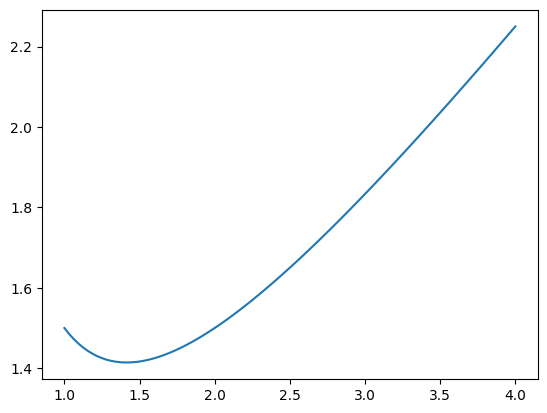

In [23]:
def f(x):
    return x/2 + 1/x

[a0,b0] = [1,4]

t = np.linspace(1, 4, 100)
plt.plot(t, f(t))

def gradf(x):
    return 1/2 - 1/x**2

x_star = 1.414213562373095 f(x_star) = 1.414213562373095


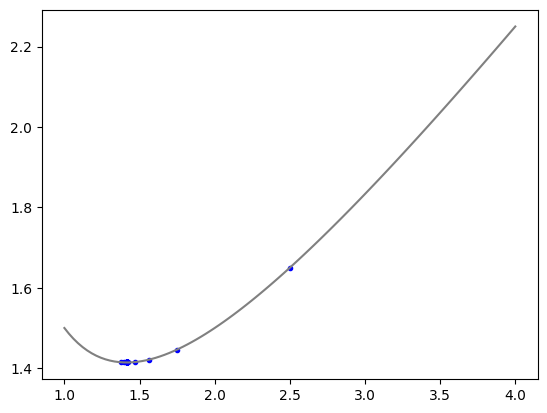

In [30]:
def metoda_bisekcije(gradf, a0, b0, num_steps=100):
    ai = a0
    bi = b0
    for _i in range(num_steps):
        xi = (ai + bi) / 2
        plt.plot(xi, f(xi), '.b')
        if gradf(xi) < 0:
            ai = xi
        else:
            bi = xi
    return ai

x_star = metoda_bisekcije(gradf, a0, b0)
plt.plot(t, f(t), 'grey')
print('x_star =', x_star, 'f(x_star) =', f(x_star))

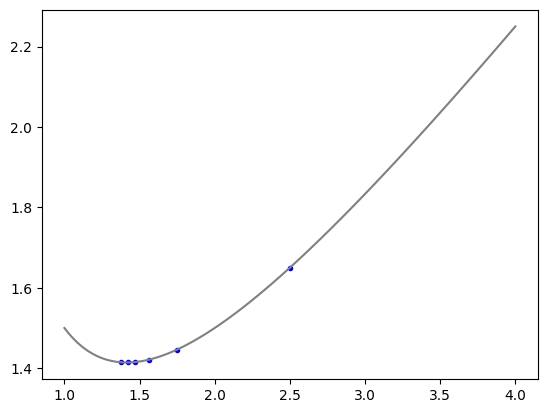

In [35]:
eps = 0.05 #tocnost
k = int(np.ceil(np.log2((b0 - a0) / eps))) # max broj koraka za eps
x_star_k = metoda_bisekcije(gradf, a0, b0, k)
plt.plot(t, f(t), 'grey')

L = 0.5


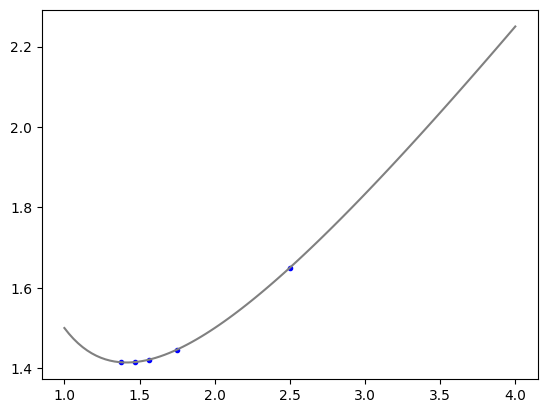

In [41]:
L = max(abs(gradf(a0)), abs(gradf(b0))) #Lipschitzova konstanta
print('L =', L)
k2 = int(np.ceil(np.log2((b0 - a0) / (eps / L))))

x_star_k2 = metoda_bisekcije(gradf, a0, b0, k2)
plt.plot(t, f(t), 'grey')

In [42]:
def bisection_method_nograd(f, a0, b0, num_steps=100, delta=0.0005):
    ai = a0
    bi = b0
    for _i in range(num_steps):
        x2i = (ai+bi)/2 - delta
        x2i1 = (ai+bi) / 2 + delta
        plt.plot(x2i, f(x2i), '.r')
        plt.plot(x2i1, f(x2i1), '.g')
        
        if f(x2i) < f(x2i1):
            bi = x2i1
        else:
            ai = x2i
    
    return ai

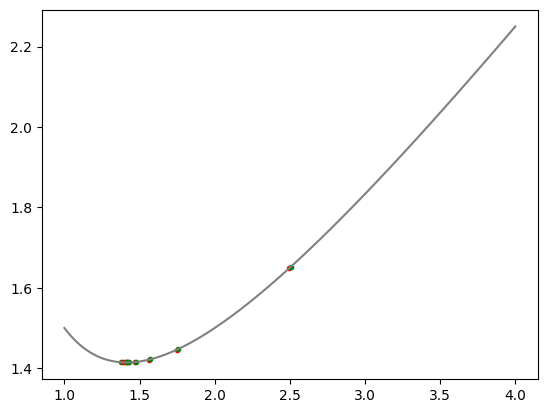

In [45]:
eps = 0.05
delta = 0.005
k = int(np.ceil(-np.log2(eps / (b0 - a0) - 2*delta)))
x_star_k = bisection_method_nograd(f, a0, b0, k, delta=delta)
plt.plot(t, f(t), 'grey')

#ostalo je sve isto

# Zlatni rez

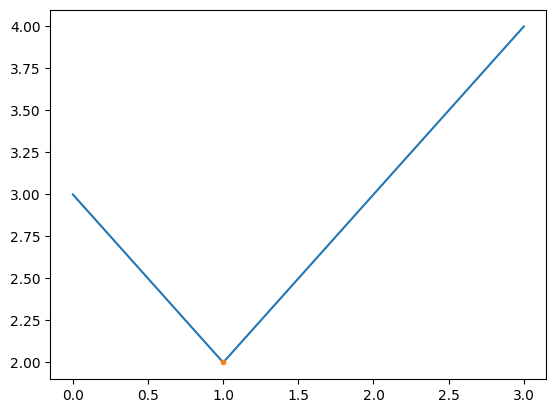

In [48]:
zr = zr = (np.sqrt(5) + 1) / 2

def zlatni_rez(f, a0, b0, num_steps=100):
    bi = b0
    ai = a0
    
    x2i = bi - (bi - ai) / zr
    fx2i = f(x2i)
    
    x2i1 = ai + (bi - ai) / zr
    fx2i1 = f(x2i1)
    
    for _i in range(num_steps):
        if fx2i < fx2i1:
            bi = x2i1
            x2i1 = x2i
            fx2i1 = fx2i
            
            x2i = bi - (bi - ai) / zr
            fx2i = f(x2i)
        else:
            ai = x2i
            x2i = x2i1
            fx2i = fx2i1
            
            x2i1 = ai + (bi - ai) / zr
            fx2i1 = f(x2i1)
            
    return ai



def f(x):
    return abs(x - 1) + 2

[a0, b0] = [0, 3]

t = np.linspace(a0, b0, 100)
x_star = zlatni_rez(f, a0, b0)
plt.plot(t, f(t))
plt.plot([x_star], [f(x_star)], '.')


# Newtonova metoda

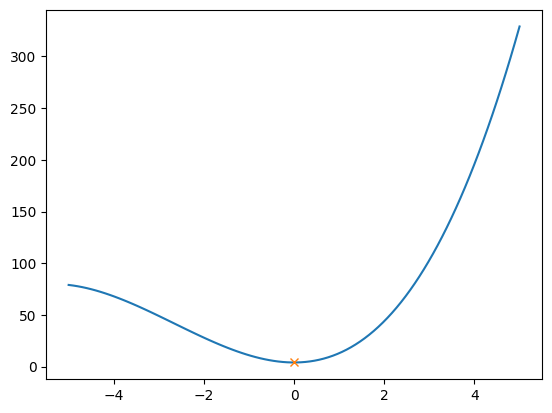

In [49]:
def newton(x0, f, gradf, hessf, num_steps=100):
    xi = x0
    for _i in range(num_steps):
        #plt.plot([xi], [f(xi)], '.')
        xi = xi - gradf(xi) / hessf(xi)
    
    return xi

def f(x):
    return x**3 + 8*x**2 + 4

[a0,b0] = [-5,5]
x0 = 2

t = np.linspace(a0, b0, 100)

def gradf(x):
    return 3*x**2 + 16*x

def hessf(x):
    return 6*x + 16

x_star = newton(x0, f, gradf, hessf, num_steps=3)
plt.plot(t, f(t))
plt.plot([x_star], [f(x_star)], 'x')

# Metoda sekanti

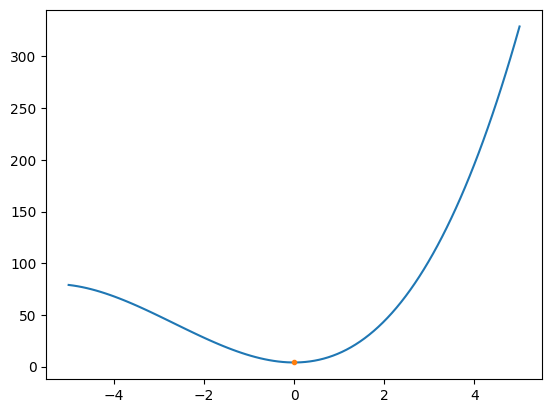

In [50]:
def secant(x0, x1, f, gradf, num_steps=100):
    xim1 = x0
    xi = x1
    for _i in range(num_steps):
        xip1 = xim1 - (xi-xim1) / (gradf(xi) - gradf(xim1)) * gradf(xim1)
        
        xim1 = xi
        xi = xip1
    
    return xi

def f(x):
    return x**3 + 8*x**2 + 4

[a0,b0] = [-5,5]
x0 = 2

t = np.linspace(a0, b0, 100)

x0 = 2
x1 = -2
x_star = secant(x0, x1, f, gradf, num_steps=10)
plt.plot(t, f(t))
plt.plot([x_star], [f(x_star)], '.')

# Gradijentna metoda

In [51]:
#minimizacija norme na kvadrat
A = np.array([
        [2,3],
        [1,3]
        ])
b = np.array([1, -1])

def f(x):
    return np.linalg.norm(A@x - b)**2

def g(x):
    return 2*A.T@(A@x - b)

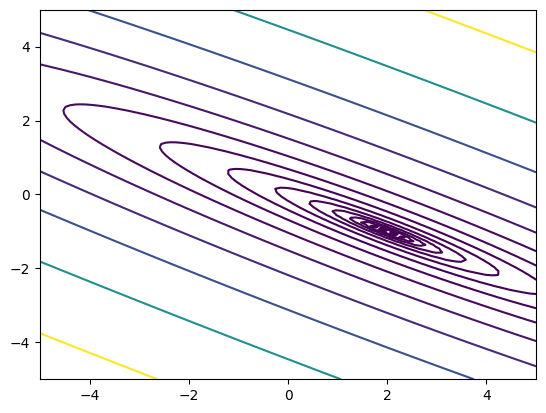

In [54]:
x = np.linspace(-5,5, 100)
y = np.linspace(-5,5, 100)
X, Y = np.meshgrid(x, y)
X = X.reshape(-1)
Y = Y.reshape(-1)
Z = np.array([ f(np.array([x,y])) for (x,y) in zip(X,Y) ])
plt.contour(X.reshape(100,100), Y.reshape(100,100), Z.reshape(100,100), levels=np.logspace(-3,6,15, base=3))

[-0.5289884   0.27047774]
2.0000000000000004
[ 1.33577273 -0.66037309]


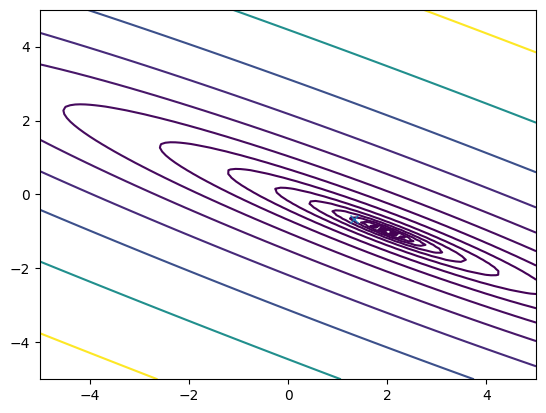

In [56]:
def gradient_method(x0, g, num_steps=100):
    step_size = 1/(2*np.linalg.norm(A.T@A))
    for _i in range(num_steps):
        #plt.plot([x0[0]], [x0[1]], '.')
        x0 = x0 - step_size * g(x0)

    return x0

x0 = np.array([-5, -5])
x_star = gradient_method(x0, g)
print(g(x_star))
print(f(np.array([0,0])))
print(x_star)
plt.contour(X.reshape(100,100), Y.reshape(100,100), Z.reshape(100,100), levels=np.logspace(-3,6,15, base=3))
plt.plot([x_star[0]], [x_star[1]], 'x')

In [57]:
def f(x):
    return np.exp(x[0] + 2) + np.exp(-x[0] + 2) + 2*np.exp(x[1] + 2) + np.exp(-x[1] + 2)

def g(x):
    return np.array([
                np.exp(x[0]+2) - np.exp(-x[0]+2),
                2*np.exp(x[1] + 2) - np.exp(-x[1]+2)
            ])

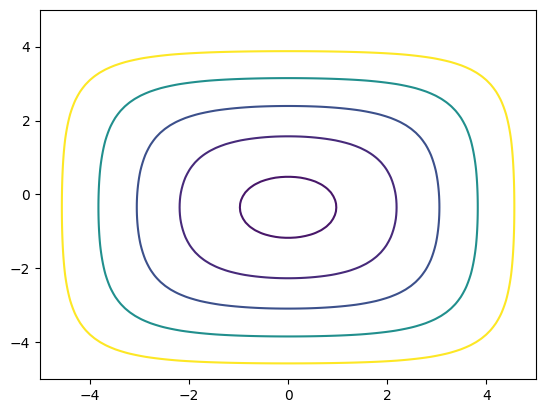

In [58]:
x = np.linspace(-5,5, 100)
y = np.linspace(-5,5, 100)
X, Y = np.meshgrid(x, y)
X = X.reshape(-1)
Y = Y.reshape(-1)
Z = np.array([ f(np.array([x,y])) for (x,y) in zip(X,Y) ])
plt.contour(X.reshape(100,100), Y.reshape(100,100), Z.reshape(100,100), levels=np.logspace(-3,6,15, base=3))

[-1.1031572e-16 -3.4657359e-01]


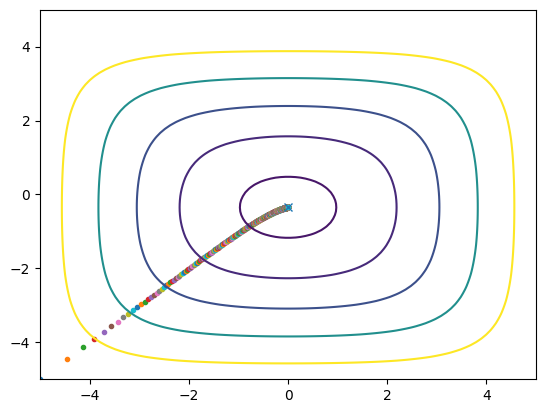

In [59]:
def gradient_method_fixed(x0, g, num_steps=10000):
    step_size = 0.0005
    for _i in range(num_steps):
        plt.plot([x0[0]], [x0[1]], '.')
        x0 = x0 - step_size * g(x0)

    return x0

x0 = np.array([-5, -5])
x_star = gradient_method_fixed(x0, g)
print(x_star)
plt.contour(X.reshape(100,100), Y.reshape(100,100), Z.reshape(100,100), levels=np.logspace(-3,6,15, base=3))
plt.plot([x_star[0]], [x_star[1]], 'x')